In [21]:
import h5py
import matplotlib.pyplot as plt
import numpy as np


hdf5_file = "outdirsis/interpolation/sis.hdf5"
with h5py.File(hdf5_file, 'r') as file:
    w_values = file['w_values'][:]
    y_values = file['y_values'][:]
    data = file['results'][:]

real = data[:,0,0]
imag = data[:,0,1]  

F = real + 1j*imag
y_values

array([0.3])

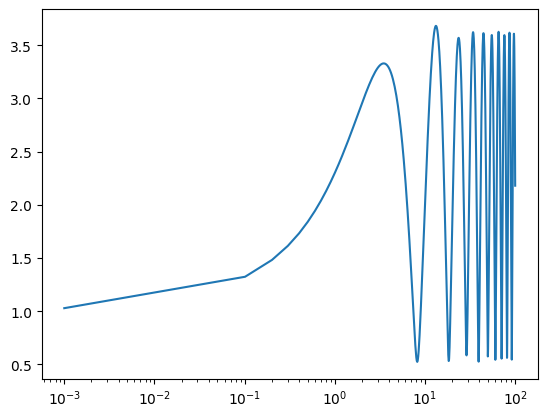

In [19]:
plt.semilogx(w_values,np.abs(F))


In [ ]:
from gwlens.tools import utilities
from scipy.interpolate import RegularGridInterpolator,RectBivariateSpline

def interpolate_2D_spline(interpolation_file, w_query, y_query):
    with h5py.File(interpolation_file, 'r') as file:
        w_values = file['w_values'][:]
        y_values = file['y_values'][:]
        data = file['results'][:]  # (len(w), len(y), 2)

    real_data = data[:, :, 0]
    imag_data = data[:, :, 1]

    real_spline = RectBivariateSpline(w_values, y_values, real_data, kx=1, ky=0)
    imag_spline = RectBivariateSpline(w_values, y_values, imag_data, kx=1, ky=0)

    real_result = real_spline(w_query, y_query, grid=True)
    imag_result = imag_spline(w_query, y_query, grid=True)

    result = real_result + 1j * imag_result
    return result

w = np.linspace(1,10,1000)
F1  = interpolate_2D_spline(hdf5_file,w,[0.3])

error: (my>ky) failed for hidden my: regrid_smth:my=1